In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
### Fincher

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,FACS_gate,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,free_annotation,organ,organism,platform
Cells_Trunk_GTCGTATTTTTT,No X1,,,Neoblast,0,Fincher,PLOD1 (dd3457)+,Atlas,Schmidtea mediterranea,Drop-seq
Cells_Trunk_GACAATGAGCGC,No X1,epidermal cell,CL:0000362,Epidermal,11,Fincher,4,Atlas,Schmidtea mediterranea,Drop-seq
Cells_Trunk_CCAGCGATCGTA,No X1,epidermal cell,CL:0000362,Epidermal,11,Fincher,7,Atlas,Schmidtea mediterranea,Drop-seq
Cells_Trunk_ATCCTGAAAGTT,No X1,,,Neoblast,0,Fincher,Neural 2,Atlas,Schmidtea mediterranea,Drop-seq
Cells_Trunk_TAAAAGGTGAAG,No X1,,,Cathepsin+ cells,4,Fincher,0,Atlas,Schmidtea mediterranea,Drop-seq


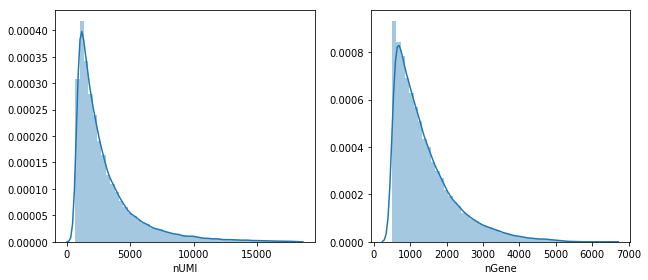

In [2]:
fincher = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Fincher/data.h5")
utils.peek(fincher, "Fincher")
fincher = fincher.normalize()
fincher.obs.head()

In [3]:
fincher_model = cb.directi.fit_DIRECTi(
    fincher, fincher.uns["seurat_genes"],
    **fixed_model_kwargs, 
    path="/tmp/cb/db/Fincher/model_0"
)
fincher.latent = fincher_model.inference(fincher)

[DIRECTi epoch 0] train=1.075, val=0.497, time elapsed=5.1s Best save...
[DIRECTi epoch 1] train=0.483, val=0.487, time elapsed=4.3s Best save...
[DIRECTi epoch 2] train=0.472, val=0.463, time elapsed=4.3s Best save...
[DIRECTi epoch 3] train=0.449, val=0.446, time elapsed=4.2s Best save...
[DIRECTi epoch 4] train=0.441, val=0.440, time elapsed=4.3s Best save...
[DIRECTi epoch 5] train=0.437, val=0.437, time elapsed=4.2s Best save...
[DIRECTi epoch 6] train=0.433, val=0.433, time elapsed=4.3s Best save...
[DIRECTi epoch 7] train=0.431, val=0.432, time elapsed=4.2s Best save...
[DIRECTi epoch 8] train=0.429, val=0.430, time elapsed=4.2s Best save...
[DIRECTi epoch 9] train=0.428, val=0.431, time elapsed=4.2s
[DIRECTi epoch 10] train=0.427, val=0.430, time elapsed=4.1s Best save...
[DIRECTi epoch 11] train=0.427, val=0.428, time elapsed=4.2s Best save...
[DIRECTi epoch 12] train=0.426, val=0.427, time elapsed=4.3s Best save...
[DIRECTi epoch 13] train=0.425, val=0.427, time elapsed=4.2s 

[  Info   ] Computing tSNE...


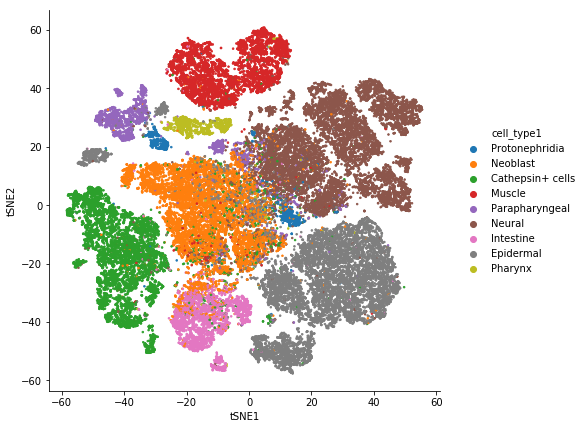

In [4]:
plot = fincher.visualize_latent("cell_type1")
plot.get_figure().savefig("Fincher/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


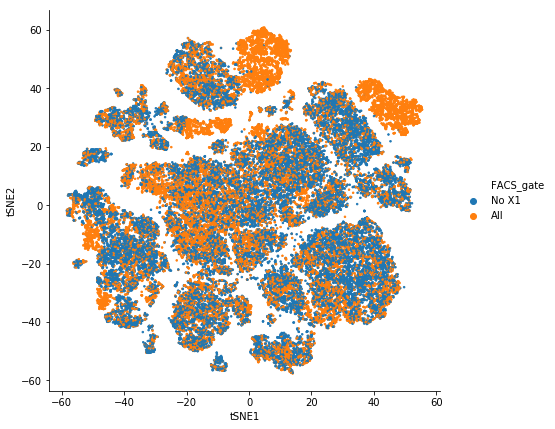

In [5]:
plot = fincher.visualize_latent("FACS_gate")
plot.get_figure().savefig("Fincher/FACS_gate.pdf", bbox_inches="tight")

In [6]:
%%capture capio
fincher_models = [fincher_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    fincher_models.append(cb.directi.fit_DIRECTi(
        fincher, fincher.uns["seurat_genes"],
        **fixed_model_kwargs, 
        random_seed=i, path="/tmp/cb/db/Fincher/model_%d" % i
    ))
fincher_blast = cb.blast.BLAST(fincher_models, fincher, 
                                               keep_exprs=True).build_empirical()
fincher_blast.save("Fincher")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Fincher/model_1/checkpoint-72
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Fincher/model_2/checkpoint-134
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Fincher/model_3/checkpoint-153


In [7]:
with open("Fincher/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Fincher/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(fincher_blast, "Fincher")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9683
Accuracy = 0.9686
